## Table of Contents
### 1. [Data Clean](#dataclean)
- [Numerical data](#num)
- [Categorical data](#cat)

### 2. [EDA](#eda)
### 3. [Feature Engineering](#fe)
### 4. [Model](#model)
- [Linear Regression](#lr)
- [PCA](#pca)
- [Random Forest](#rf)
- [XGBoost](#xg)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

## Data Clean<a class="anchor" id="dataclean"></a>

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,sold_time,address,price,property_type,area,beds,baths,parking,school,longterm_resident,under_20,20_39,40_59,60+,district
0,Listing sold by advertiser 25th January 2020,306/19 Epping RoadEpping NSW 2121,"SOLD - $882,000",Apartment / Unit / Flat,106m²,2.0,2 Baths,1 Parking,Epping Public School,44%,18%,38%,29%,15%,Epping
1,Listing sold by advertiser 21st January 2020,4/143 Carlingford RoadEpping NSW 2121,"SOLD - $980,000",Townhouse,213m²,3.0,1 Bath,2 Parking,Epping West Public School,59%,28%,26%,30%,16%,Epping
2,Listing sold by advertiser 21st January 2020,CP06/11-27 Cliff RdEpping NSW 2121,"SOLD - $880,000",Apartment / Unit / Flat,NaN,2.0,2 Baths,1 Parking,Epping Heights Public School,50%,20%,38%,27%,15%,Epping
3,Listing sold by advertiser 17th January 2020,BG06/18 Carlingford RoadEpping NSW 2121,"SOLD - $535,000",Apartment / Unit / Flat,93m²,1.0,1 Bath,1 Parking,Epping Heights Public School,50%,20%,38%,27%,15%,Epping
4,Listing sold by advertiser 15th January 2020,3 & 3A Dawson StreetEpping NSW 2121,"SOLD - $1,970,000",House,853m²,5.0,2 Baths,1 Parking,Cheltenham Girls High School,75%,22%,22%,28%,28%,Epping


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
sold_time            640 non-null object
address              640 non-null object
price                640 non-null object
property_type        640 non-null object
area                 314 non-null object
beds                 637 non-null float64
baths                637 non-null object
parking              637 non-null object
school               640 non-null object
longterm_resident    621 non-null object
under_20             640 non-null object
20_39                640 non-null object
40_59                640 non-null object
60+                  640 non-null object
district             640 non-null object
dtypes: float64(1), object(14)
memory usage: 75.1+ KB


### Numerical data<a class="anchor" id="num"></a>

In [5]:
df.area.value_counts()

695m²                                                                                                                                                                                                                                                 7
2 .css-9fxapx{position:absolute;width:1px;height:1px;margin:-1px;padding:0;-webkit-clip:rect(1px,1px,1px,1px);clip:rect(1px,1px,1px,1px);border:0;overflow:hidden;-webkit-clip-path:inset(100%);clip-path:inset(100%);-webkit-clip-path:none;}Beds    6
4 .css-9fxapx{position:absolute;width:1px;height:1px;margin:-1px;padding:0;-webkit-clip:rect(1px,1px,1px,1px);clip:rect(1px,1px,1px,1px);border:0;overflow:hidden;-webkit-clip-path:inset(100%);clip-path:inset(100%);-webkit-clip-path:none;}Beds    5
930m²                                                                                                                                                                                                                                                 5
109m²   

In [6]:
df.area = df.area.str.strip(' ').str.strip('m²').str.replace(',','')

In [7]:
def trans(x):
    
    try:
#         x = x.split(':')
#         if len(x) < 2:
#             return float(x[0])
#         else:
#             return np.nan
        return float(x)
    except:
#         print(x)
        return np.nan

In [8]:
df.area = df.area.map(trans)

In [9]:
df.area.value_counts()

695.0     7
930.0     6
109.0     4
923.0     4
929.0     4
         ..
1132.0    1
815.0     1
253.0     1
335.0     1
106.0     1
Name: area, Length: 214, dtype: int64

In [10]:
df.baths = df.baths.str.split(' ').str[0].astype(float)

In [11]:
df.parking = df.parking.str.split(' ').str[0]

In [12]:
df.parking.value_counts()

2    309
1    261
3     39
4     20
−      8
Name: parking, dtype: int64

In [13]:
df.parking = df.parking.map(lambda x: np.nan if x == '−' else x).astype(float)

In [14]:
df.parking.value_counts()

2.0    309
1.0    261
3.0     39
4.0     20
Name: parking, dtype: int64

In [15]:
df.price = df.price.str.split(' ').str[-1].str.strip('$').str.replace(',','').astype(float)

In [16]:
df.sold_time = df.sold_time.str.split(' ').str[-3:].str.join(' ')

In [17]:
df.sold_time = pd.to_datetime(df.sold_time)

In [18]:
df.longterm_resident = df.longterm_resident.str.strip('%').astype(float)/100

In [19]:
df.under_20 = df.under_20.str.strip('%').astype(float)/100
df['20_39'] = df['20_39'].str.strip('%').astype(float)/100
df['40_59'] = df['40_59'].str.strip('%').astype(float)/100
df['60+'] = df['60+'].str.strip('%').astype(float)/100

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
sold_time            640 non-null datetime64[ns]
address              640 non-null object
price                640 non-null float64
property_type        640 non-null object
area                 299 non-null float64
beds                 637 non-null float64
baths                637 non-null float64
parking              629 non-null float64
school               640 non-null object
longterm_resident    621 non-null float64
under_20             640 non-null float64
20_39                640 non-null float64
40_59                640 non-null float64
60+                  640 non-null float64
district             640 non-null object
dtypes: datetime64[ns](1), float64(10), object(4)
memory usage: 75.1+ KB


In [21]:
df[df.area.notnull()].isnull().sum()

sold_time            0
address              0
price                0
property_type        0
area                 0
beds                 1
baths                1
parking              7
school               0
longterm_resident    3
under_20             0
20_39                0
40_59                0
60+                  0
district             0
dtype: int64

### Categorical Data<a class="anchor" id="cat"></a>

In [22]:
df.property_type.value_counts()

House                            305
Apartment / Unit / Flat          232
Townhouse                         54
Semi-Detached                     23
Duplex                            11
Villa                             10
Vacant land                        2
New Apartments / Off the Plan      2
New House & Land                   1
Name: property_type, dtype: int64

In [23]:
df.property_type[df.property_type == 'New House & Land'] = 'House'
df.property_type[df.property_type == 'New Apartments / Off the Plan'] = 'Apartment / Unit / Flat'

C:\Users\yuwen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\yuwen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df.property_type.value_counts()

House                      306
Apartment / Unit / Flat    234
Townhouse                   54
Semi-Detached               23
Duplex                      11
Villa                       10
Vacant land                  2
Name: property_type, dtype: int64

## EDA<a class="anchor" id="eda"></a>

In [25]:
df.head()

,sold_time,address,price,property_type,area,beds,baths,parking,school,longterm_resident,under_20,20_39,40_59,60+,district
0,2020-01-25,306/19 Epping RoadEpping NSW 2121,882000.0,Apartment / Unit / Flat,106.0,2.0,2.0,1.0,Epping Public School,0.44,0.18,0.38,0.29,0.15,Epping
1,2020-01-21,4/143 Carlingford RoadEpping NSW 2121,980000.0,Townhouse,213.0,3.0,1.0,2.0,Epping West Public School,0.59,0.28,0.26,0.30,0.16,Epping
2,2020-01-21,CP06/11-27 Cliff RdEpping NSW 2121,880000.0,Apartment / Unit / Flat,NaN,2.0,2.0,1.0,Epping Heights Public School,0.50,0.20,0.38,0.27,0.15,Epping
3,2020-01-17,BG06/18 Carlingford RoadEpping NSW 2121,535000.0,Apartment / Unit / Flat,93.0,1.0,1.0,1.0,Epping Heights Public School,0.50,0.20,0.38,0.27,0.15,Epping
4,2020-01-15,3 & 3A Dawson StreetEpping NSW 2121,1970000.0,House,853.0,5.0,2.0,1.0,Cheltenham Girls High School,0.75,0.22,0.22,0.28,0.28,Epping


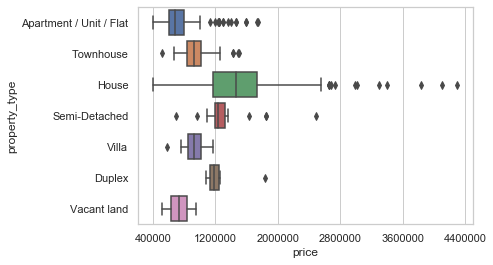

In [27]:
sns.set(style="whitegrid")
g = sns.boxplot(x="price", y="property_type", data=df, orient="h")
g.set_xticks(range(400000, 5000000, 800000))


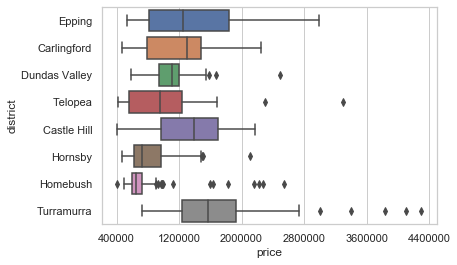

In [28]:
g = sns.boxplot(x="price", y="district", data=df, orient="h")
g.set_xticks(range(400000, 5000000, 800000))

[Text(0.5, 0, 'Number')]

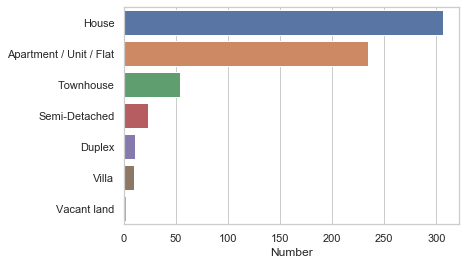

In [131]:
sns.barplot(df.property_type.value_counts().values,df.property_type.value_counts().index).set(xlabel='Number')

In [26]:
df.describe()

,price,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+
count,6.400000e+02,299.000000,637.00000,637.000000,629.000000,621.000000,640.000000,640.000000,640.000000,640.000000
mean,1.162879e+06,691.046154,3.22763,2.009419,1.710652,0.573784,0.250922,0.298500,0.272813,0.177875
std,5.479438e+05,457.900146,1.19879,0.796951,0.721969,0.153133,0.048669,0.103677,0.039598,0.088834
min,4.050000e+05,76.000000,1.00000,1.000000,1.000000,0.130000,0.010000,0.010000,0.050000,0.010000
25%,7.300000e+05,441.750000,2.00000,2.000000,1.000000,0.470000,0.220000,0.230000,0.250000,0.120000
50%,1.034500e+06,695.600000,3.00000,2.000000,2.000000,0.610000,0.260000,0.270000,0.280000,0.170000
75%,1.465000e+06,879.800000,4.00000,2.000000,2.000000,0.700000,0.280000,0.330000,0.300000,0.220000
max,4.300000e+06,4017.000000,10.00000,8.000000,4.000000,0.830000,0.390000,0.700000,0.370000,0.920000


C:\Users\yuwen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yuwen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


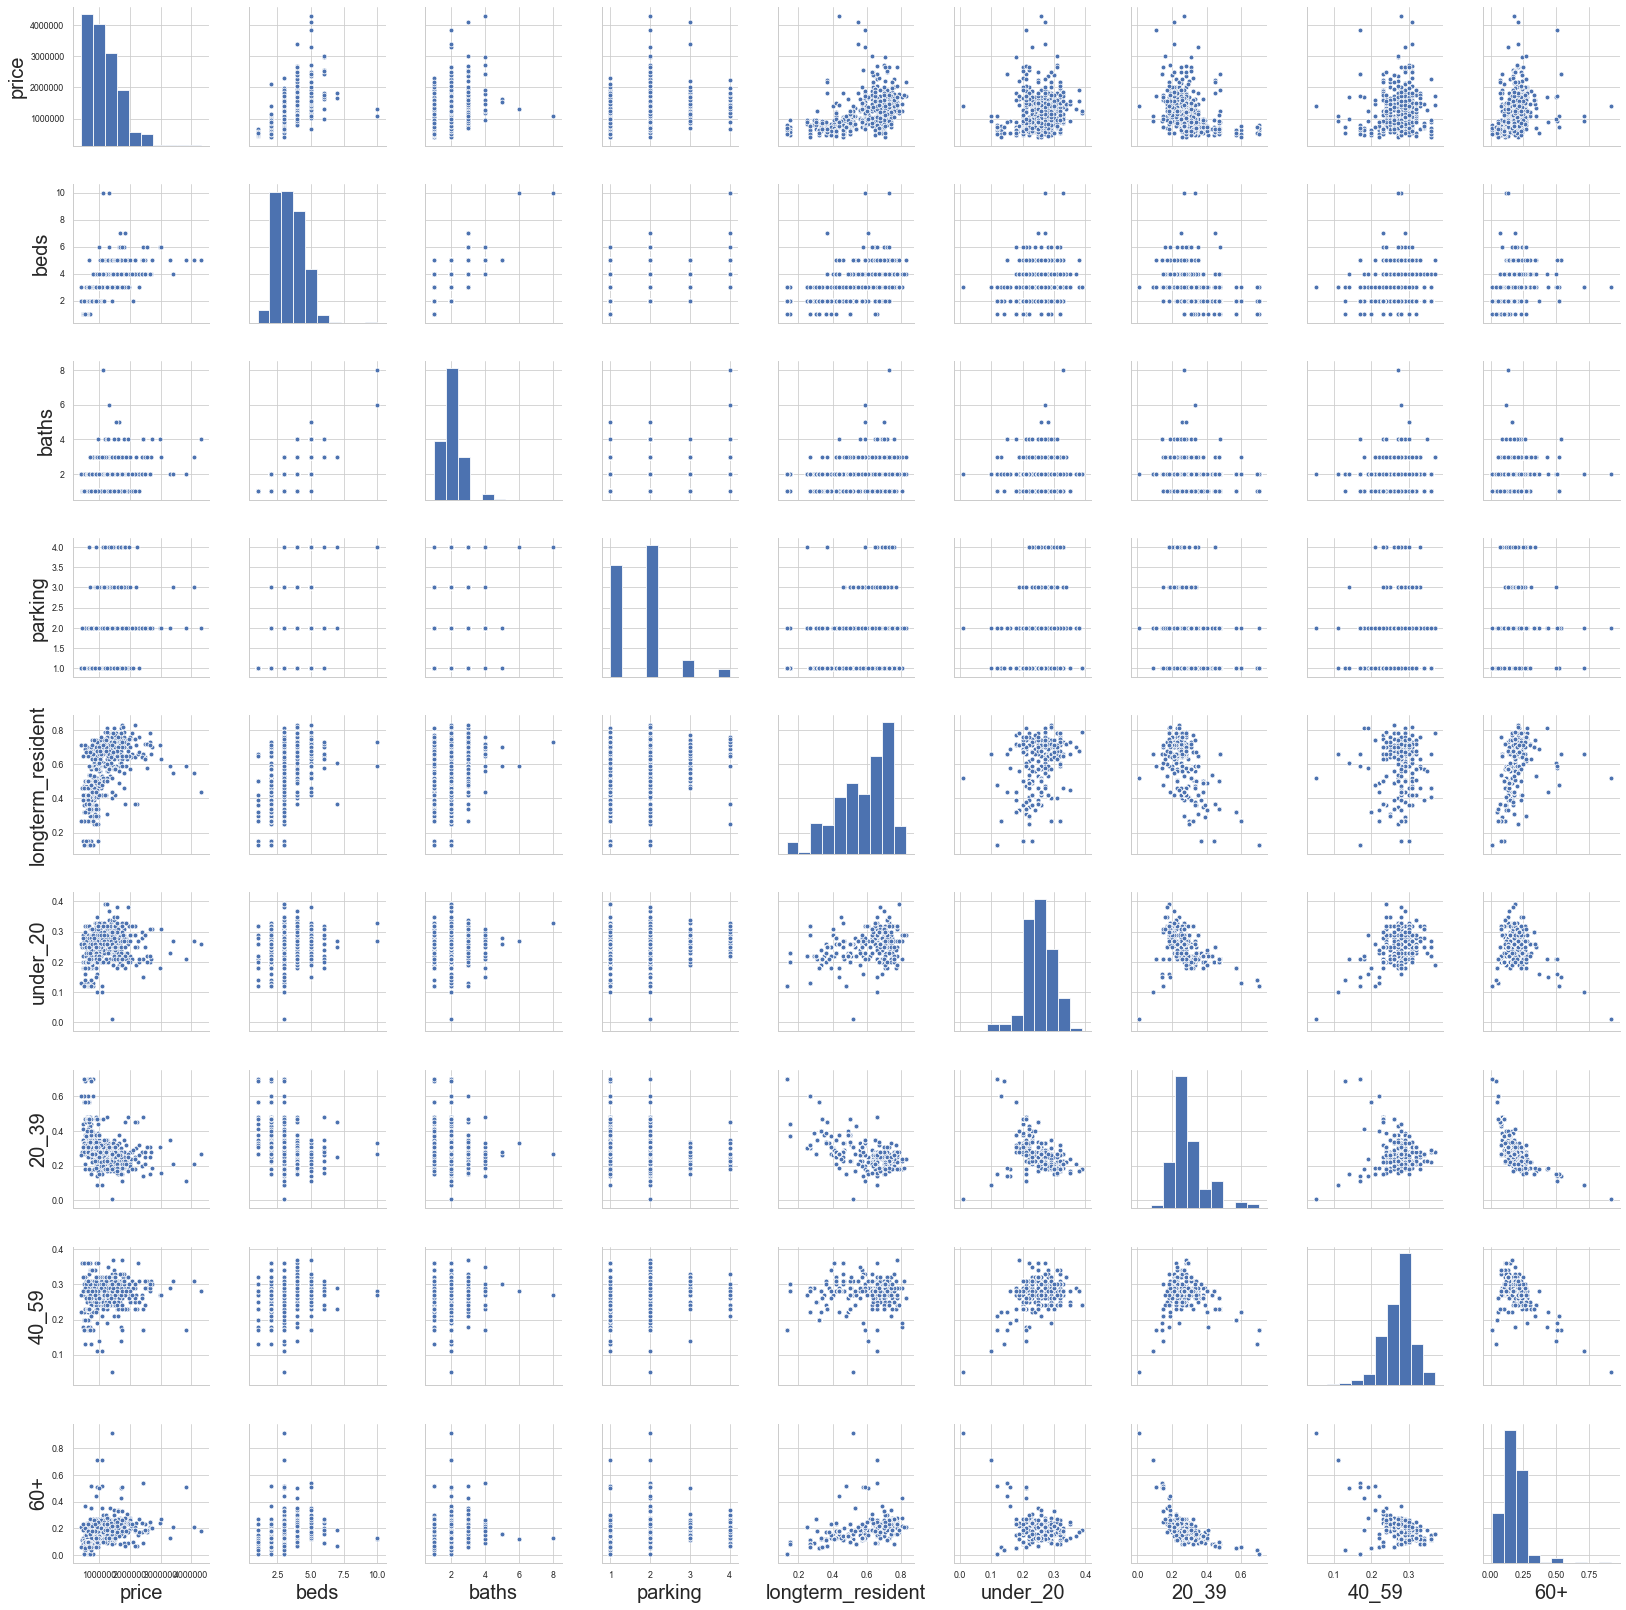

In [104]:
# Pairplot between variables
sns.set_context("paper", rc={"axes.labelsize":20})
sns.pairplot(df[['price','beds','baths','parking','longterm_resident','under_20', '20_39', '40_59', '60+']])

In [29]:
df[['price','area','beds','baths','parking','longterm_resident','under_20', '20_39', '40_59', '60+']].corr(method='pearson')

,price,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+
price,1.000000,0.486616,0.675943,0.394162,0.442264,0.496815,0.233891,-0.450129,0.085660,0.358112
area,0.486616,1.000000,0.387713,0.107257,0.215401,0.357003,0.207110,-0.339927,0.206770,0.137763
beds,0.675943,0.387713,1.000000,0.674162,0.552787,0.522946,0.263202,-0.423274,0.100214,0.304182
baths,0.394162,0.107257,0.674162,1.000000,0.420907,0.233973,0.071167,-0.134759,0.005644,0.115950
parking,0.442264,0.215401,0.552787,0.420907,1.000000,0.340818,0.201646,-0.330909,0.108606,0.224916
longterm_resident,0.496815,0.357003,0.522946,0.233973,0.340818,1.000000,0.400691,-0.613665,0.116285,0.432237
under_20,0.233891,0.207110,0.263202,0.071167,0.201646,0.400691,1.000000,-0.556192,0.445602,-0.095395
20_39,-0.450129,-0.339927,-0.423274,-0.134759,-0.330909,-0.613665,-0.556192,1.000000,-0.348831,-0.702458
40_59,0.085660,0.206770,0.100214,0.005644,0.108606,0.116285,0.445602,-0.348831,1.000000,-0.287207
60+,0.358112,0.137763,0.304182,0.115950,0.224916,0.432237,-0.095395,-0.702458,-0.287207,1.000000


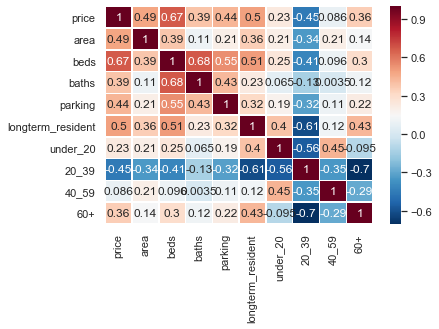

In [126]:
pearsoncorr = df[['price','area','beds','baths','parking','longterm_resident','under_20', '20_39', '40_59', '60+']].corr(method='pearson')
# plt.subplots(figsize=(10,8))
# plt.figure(figsize = (10,8))
# sns.set()
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Feature Engineering<a class="anchor" id="fe"></a>

In [31]:
df.beds.fillna(1, inplace=True)
df.baths.fillna(1,inplace=True)
df.parking.fillna(1,inplace=True)

In [32]:
df_clean = df.copy()

In [34]:
# df_clean.to_csv('cleandata.csv', index=False)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
sold_time            640 non-null datetime64[ns]
address              640 non-null object
price                640 non-null float64
property_type        640 non-null object
area                 299 non-null float64
beds                 640 non-null float64
baths                640 non-null float64
parking              640 non-null float64
school               640 non-null object
longterm_resident    621 non-null float64
under_20             640 non-null float64
20_39                640 non-null float64
40_59                640 non-null float64
60+                  640 non-null float64
district             640 non-null object
dtypes: datetime64[ns](1), float64(10), object(4)
memory usage: 75.1+ KB


In [34]:
# Fill nan in longterm_resident with group mean

df_clean.longterm_resident = df_clean.groupby('district').longterm_resident.transform(lambda x: x.fillna(x.mean()))

In [35]:
df_clean.groupby('district').longterm_resident.mean()

district
Carlingford      0.640988
Castle Hill      0.636857
Dundas Valley    0.656625
Epping           0.564500
Homebush         0.417403
Hornsby          0.477778
Telopea          0.567160
Turramurra       0.620625
Name: longterm_resident, dtype: float64

In [123]:
df_clean.loc[530]

sold_time                             2019-09-27 00:00:00
address              405/3 Nipper StreetHomebush NSW 2140
price                                              718000
property_type                     Apartment / Unit / Flat
area                                                  NaN
beds                                                    2
baths                                                   2
parking                                                 1
school                             Homebush Public School
longterm_resident                                0.417403
under_20                                             0.14
20_39                                                0.69
40_59                                                0.13
60+                                                  0.04
district                                         Homebush
Name: 530, dtype: object

In [119]:
df_clean[df_clean.longterm_resident.isnull()]

,sold_time,address,price,property_type,area,beds,baths,parking,school,longterm_resident,under_20,20_39,40_59,60+,district
325,2020-01-28,31 Kirkwall AvenueCastle Hill NSW 2154,1170000.0,House,824.0,3.0,2.0,2.0,Sherwood Ridge Public School,NaN,0.32,0.27,0.30,0.10,Castle Hill
331,2020-01-20,37/8-14 Mercer StreetCastle Hill NSW 2154,811000.0,Apartment / Unit / Flat,NaN,2.0,2.0,2.0,Castle Hill Public School,NaN,0.25,0.34,0.26,0.14,Castle Hill
333,2020-01-13,139/23-35 Crane RoadCastle Hill NSW 2154,752000.0,Apartment / Unit / Flat,NaN,3.0,2.0,2.0,Castle Hill Public School,NaN,0.29,0.27,0.29,0.15,Castle Hill
336,2019-12-21,13/77 Crane RoadCastle Hill NSW 2154,1000000.0,Townhouse,NaN,3.0,2.0,2.0,Castle Hill Public School,NaN,0.29,0.27,0.29,0.15,Castle Hill
380,2019-11-23,8/75a Crane RoadCastle Hill NSW 2154,926000.0,Villa,NaN,3.0,1.0,2.0,Castle Hill Public School,NaN,0.29,0.27,0.29,0.15,Castle Hill
393,2019-11-15,112/23-35 Crane RoadCastle Hill NSW 2154,800000.0,Apartment / Unit / Flat,NaN,2.0,2.0,2.0,Castle Hill Public School,NaN,0.29,0.27,0.29,0.15,Castle Hill
397,2019-11-11,14 Worthing AvenueCastle Hill NSW 2154,1822500.0,House,1113.0,5.0,1.0,1.0,Castle Hill High School,NaN,0.22,0.23,0.27,0.28,Castle Hill
399,2019-11-11,13 Northwood PlaceCastle Hill NSW 2154,1470000.0,House,NaN,4.0,2.0,2.0,Sherwood Ridge Public School,NaN,0.32,0.23,0.34,0.11,Castle Hill
403,2020-01-22,1512/1C Burdett StreetHornsby NSW 2077,695000.0,Apartment / Unit / Flat,NaN,2.0,1.0,1.0,Asquith Boys High School,NaN,0.31,0.27,0.34,0.08,Hornsby
418,2019-12-07,19 Forbes StreetHornsby NSW 2077,2105000.0,House,1107.0,2.0,1.0,1.0,Hornsby South Public School,NaN,0.32,0.29,0.29,0.10,Hornsby


* Fill nan in area

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [37]:
features = list(df_clean)
target = 'price'
features.remove('price')
features.remove('sold_time')
features.remove('address')
# features.remove('area')

In [38]:
Xtemp = df_clean[features]

In [39]:
categ = ['property_type', 'school', 'district']

In [40]:
Xtemp = pd.get_dummies(Xtemp, columns=categ,
               drop_first=True, prefix=categ)

In [41]:
Xtemp.head()

,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+,property_type_Duplex,...,school_Waitara Public School,school_Warrawee Public School,school_Yates Avenue Public School,district_Castle Hill,district_Dundas Valley,district_Epping,district_Homebush,district_Hornsby,district_Telopea,district_Turramurra
0,106.0,2.0,2.0,1.0,0.44,0.18,0.38,0.29,0.15,0,...,0,0,0,0,0,1,0,0,0,0
1,213.0,3.0,1.0,2.0,0.59,0.28,0.26,0.30,0.16,0,...,0,0,0,0,0,1,0,0,0,0
2,NaN,2.0,2.0,1.0,0.50,0.20,0.38,0.27,0.15,0,...,0,0,0,0,0,1,0,0,0,0
3,93.0,1.0,1.0,1.0,0.50,0.20,0.38,0.27,0.15,0,...,0,0,0,0,0,1,0,0,0,0
4,853.0,5.0,2.0,1.0,0.75,0.22,0.22,0.28,0.28,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
X = Xtemp.copy()

In [43]:
X.head()

,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+,property_type_Duplex,...,school_Waitara Public School,school_Warrawee Public School,school_Yates Avenue Public School,district_Castle Hill,district_Dundas Valley,district_Epping,district_Homebush,district_Hornsby,district_Telopea,district_Turramurra
0,106.0,2.0,2.0,1.0,0.44,0.18,0.38,0.29,0.15,0,...,0,0,0,0,0,1,0,0,0,0
1,213.0,3.0,1.0,2.0,0.59,0.28,0.26,0.30,0.16,0,...,0,0,0,0,0,1,0,0,0,0
2,NaN,2.0,2.0,1.0,0.50,0.20,0.38,0.27,0.15,0,...,0,0,0,0,0,1,0,0,0,0
3,93.0,1.0,1.0,1.0,0.50,0.20,0.38,0.27,0.15,0,...,0,0,0,0,0,1,0,0,0,0
4,853.0,5.0,2.0,1.0,0.75,0.22,0.22,0.28,0.28,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
imp = IterativeImputer(max_iter=10, random_state=0)

In [45]:
Xtemp = imp.fit_transform(Xtemp)

In [46]:
Xtemp

array([[1.06000000e+02, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.13000000e+02, 3.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.89287190e+02, 2.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.49391294e+02, 3.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.57716407e+02, 3.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.56200000e+03, 5.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [163]:
Xtemp.shape

(640, 60)

In [47]:
X[:] = Xtemp
X.head()

,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+,property_type_Duplex,...,school_Waitara Public School,school_Warrawee Public School,school_Yates Avenue Public School,district_Castle Hill,district_Dundas Valley,district_Epping,district_Homebush,district_Hornsby,district_Telopea,district_Turramurra
0,106.00000,2.0,2.0,1.0,0.44,0.18,0.38,0.29,0.15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,213.00000,3.0,1.0,2.0,0.59,0.28,0.26,0.30,0.16,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,189.28719,2.0,2.0,1.0,0.50,0.20,0.38,0.27,0.15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,93.00000,1.0,1.0,1.0,0.50,0.20,0.38,0.27,0.15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,853.00000,5.0,2.0,1.0,0.75,0.22,0.22,0.28,0.28,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 60 columns):
area                                         640 non-null float64
beds                                         640 non-null float64
baths                                        640 non-null float64
parking                                      640 non-null float64
longterm_resident                            640 non-null float64
under_20                                     640 non-null float64
20_39                                        640 non-null float64
40_59                                        640 non-null float64
60+                                          640 non-null float64
property_type_Duplex                         640 non-null float64
property_type_House                          640 non-null float64
property_type_Semi-Detached                  640 non-null float64
property_type_Townhouse                      640 non-null float64
property_type_Vacant land            

In [50]:
y = df_clean[target]

In [51]:
y.shape

(640,)

In [52]:
# scaler = MinMaxScaler()
# X.area = scaler.fit_transform(X.area.values.reshape(-1,1))

## Model<a class="anchor" id="model"></a>

### Linear Regression<a class="anchor" id="lr"></a>

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
X1 = X.copy()

In [102]:
scaler = MinMaxScaler()
X1.area = scaler.fit_transform(X1.area.values.reshape(-1,1))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=0)

In [104]:
X_train.head()

,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+,property_type_Duplex,...,school_Waitara Public School,school_Warrawee Public School,school_Yates Avenue Public School,district_Castle Hill,district_Dundas Valley,district_Epping,district_Homebush,district_Hornsby,district_Telopea,district_Turramurra
484,0.014836,2.0,2.0,1.0,0.32,0.18,0.57,0.20,0.05,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
391,0.194189,5.0,4.0,3.0,0.72,0.27,0.25,0.29,0.19,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
249,0.243766,3.0,2.0,3.0,0.66,0.24,0.23,0.27,0.26,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
243,0.050675,3.0,1.0,1.0,0.47,0.27,0.33,0.28,0.13,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369,0.273965,4.0,3.0,2.0,0.65,0.33,0.23,0.28,0.17,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
lrmodel = LinearRegression()

In [106]:
lrmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
y_train_pred = lrmodel.predict(X_train)

In [108]:
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.46e+05
train MSE: 5.14e+10
train R2: 0.809


In [109]:
y_test_pred = lrmodel.predict(X_test)

In [110]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 2.04e+05
test MSE: 1.20e+11
test R2: 0.693


### Tune PCA hyperparameters to optimise the model

* Check PCA

In [59]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

principalDf = pd.DataFrame(data = X_train_pca, 
                          columns = [i for i in range(1, len(pca.explained_variance_ratio_)+1)])

In [112]:
principalDf.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-1.430229,0.960063,0.060404,0.100032,-0.285253,0.971025,-0.072526,0.022061,0.118374,0.120028,...,0.023686,-0.010542,-0.011324,-0.016880,0.001767,0.000487,-3.865549e-16,3.619762e-16,-7.716523e-17,-1.639709e-16
1,2.917564,0.659929,0.750467,-0.300680,-0.206530,-0.172468,-0.285425,-0.605243,-0.358425,0.562297,...,-0.002004,0.019762,-0.038330,0.000782,-0.013382,0.000593,-1.535354e-15,-1.014239e-16,1.215736e-16,7.390035e-18
2,0.415976,-0.721074,0.992168,-0.317767,0.643431,0.116375,0.025935,0.198635,0.416500,0.720523,...,0.025267,-0.009667,0.075975,0.008195,-0.012519,-0.000804,-6.032672e-16,5.418717e-17,1.539506e-16,-1.037263e-16
3,-0.962553,-0.342754,-0.592581,-0.583243,1.265418,0.150912,-0.040237,-0.172550,-0.140491,-0.689284,...,0.017681,0.000930,-0.005729,-0.035089,-0.004184,-0.002622,9.648872e-16,5.338684e-18,-9.500211e-17,-2.085123e-17
4,1.354170,0.302437,0.174808,-0.257138,-0.304339,-0.134216,-0.313384,-0.655339,-0.619143,0.551304,...,-0.004956,0.021927,0.042320,-0.042557,-0.009705,-0.004264,-1.629329e-15,-6.883597e-17,3.031586e-16,-3.298284e-17


In [113]:
pca.explained_variance_ratio_

array([4.43668918e-01, 8.19307335e-02, 7.25671525e-02, 4.54812868e-02,
       4.27287213e-02, 3.79840258e-02, 3.32328786e-02, 3.19601414e-02,
       2.72996725e-02, 2.63470167e-02, 1.45714853e-02, 1.32537144e-02,
       1.05717296e-02, 9.86498157e-03, 8.25145144e-03, 7.59543625e-03,
       6.99178809e-03, 6.16106379e-03, 6.02581652e-03, 5.86152976e-03,
       5.57504003e-03, 4.96534702e-03, 4.74943931e-03, 3.92358566e-03,
       3.68818862e-03, 3.54952836e-03, 3.49389277e-03, 3.38019292e-03,
       3.01647320e-03, 2.86879309e-03, 2.74812903e-03, 2.53304475e-03,
       2.30028323e-03, 2.25613129e-03, 2.03799591e-03, 1.98322155e-03,
       1.85024904e-03, 1.55500659e-03, 1.44299245e-03, 1.32519245e-03,
       1.19130295e-03, 1.07337493e-03, 8.89490909e-04, 8.82269302e-04,
       7.27869193e-04, 5.51116979e-04, 5.17708790e-04, 4.94593587e-04,
       4.52099031e-04, 4.17810331e-04, 3.81788373e-04, 3.34703597e-04,
       3.24799729e-04, 1.17212213e-04, 5.04356534e-05, 1.15314756e-06,
      

In [114]:
var_ratio = pca.explained_variance_ratio_
var = np.cumsum(var_ratio)

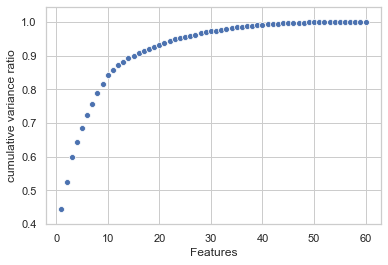

In [134]:
xaxis = [i for i in range(1, len(pca.explained_variance_ratio_)+1)]

plt.figure()
plt.xlabel('Features')
plt.ylabel('cumulative variance ratio')
sns.scatterplot(xaxis, var)

* Pipeline and GridSearchCV

In [135]:
steps = [('pca', PCA()),
         ('lr', LinearRegression())]

model = Pipeline(steps)
model = model.fit(X_train, y_train)

In [138]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
parameters = {'pca__n_components': range(40, 45,1)}

gs = GridSearchCV(model, parameters, scoring=mse_scorer)

gs = gs.fit(X_train, y_train)


print(gs.best_params_)

C:\Users\yuwen\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'pca__n_components': 41}


In [139]:
y_train_pred = gs.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.55e+05
train MSE: 5.75e+10
train R2: 0.786


In [140]:
y_test_pred = gs.predict(X_test)

In [141]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 2.08e+05
test MSE: 1.23e+11
test R2: 0.684


## Random Forest<a class="anchor" id="rf"></a>

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
rfmodel = RandomForestRegressor(random_state=0)

In [71]:
rfmodel.fit(X_train, y_train)

C:\Users\yuwen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [72]:
y_train_pred = rfmodel.predict(X_train)

# Calculate train score: MAE, MSE, and R2 score.
print('train MAE: {}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {}'.format(r2_score(y_train, y_train_pred)))


train MAE: 62633.28392631674
train MSE: 10491579733.050743
train R2: 0.960991610409477


In [73]:
y_test_pred = rfmodel.predict(X_test)

# Calculate test score: MAE, MSE, and R2 score.
print('test MAE: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {}'.format(r2_score(y_test, y_test_pred)))

test MAE: 175748.9140683622
test MSE: 90181680821.75671
test R2: 0.7692969010755302


Text(0, 0.5, 'feature importances')

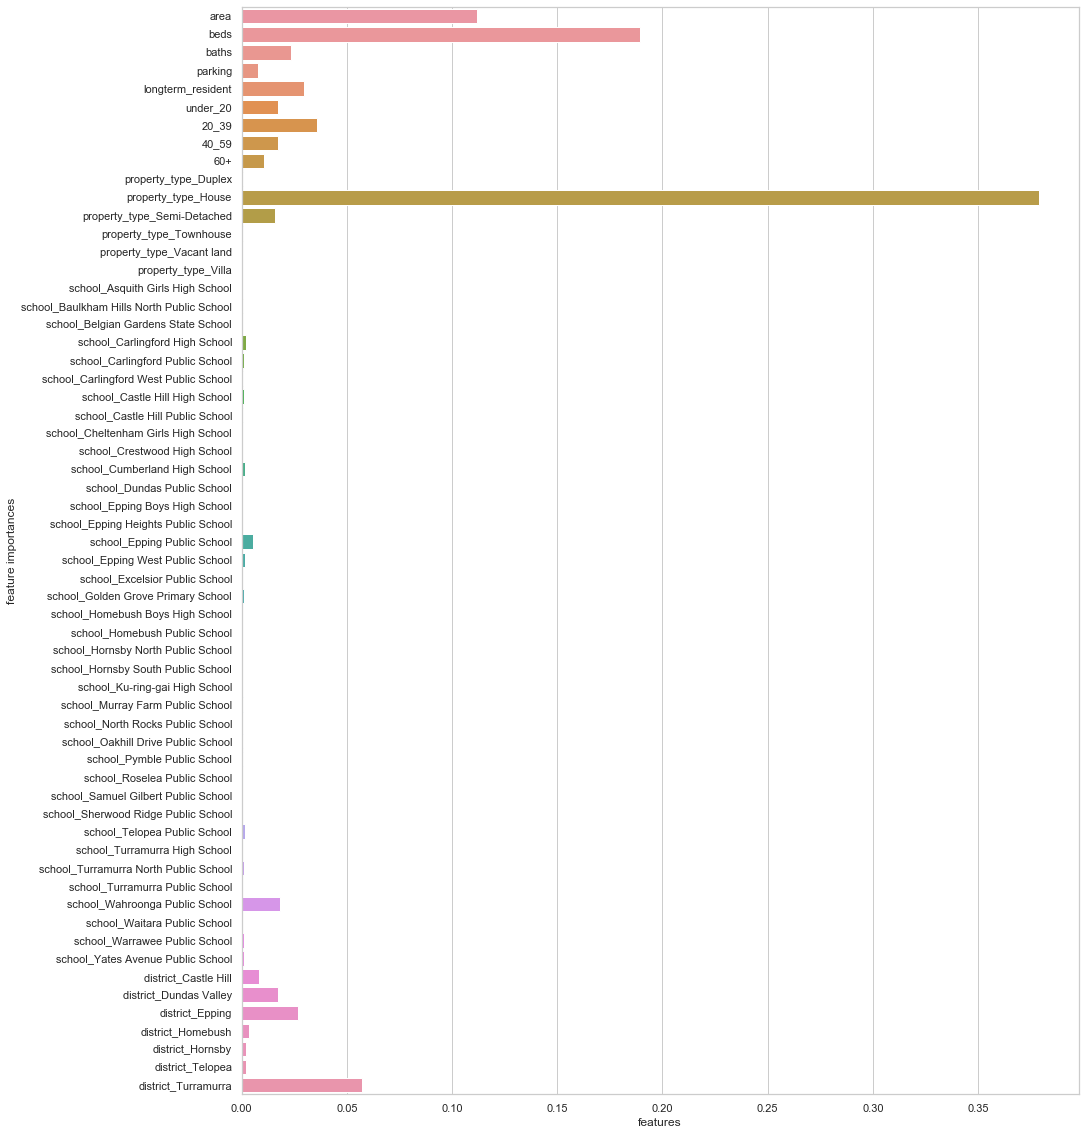

In [74]:
plt.figure(figsize=(15,20)) 
# sns.set_style('whitegrid')
sns.barplot(rfmodel.feature_importances_, X_test.columns)
plt.xlabel('features')
plt.ylabel('feature importances')
# plt.title('Figure 8')

* Hyperparameters tuning

In [75]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
param_grid = {"n_estimators": [100, 200],
              "max_depth": [8, 10, 15]
              }

rfgs = GridSearchCV(rfmodel, param_grid, scoring=mse_scorer, cv=5)

rfgs = rfgs.fit(X_train, y_train)




In [76]:
print(rfgs.best_params_)

{'max_depth': 15, 'n_estimators': 200}


In [77]:
y_train_pred = rfgs.predict(X_train)

# Calculate train score: MAE, MSE, and R2 score.
print('train MAE: {}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {}'.format(r2_score(y_train, y_train_pred)))

train MAE: 60687.08644452869
train MSE: 9300989287.22245
train R2: 0.9654183046857754


In [78]:
y_test_pred = rfgs.predict(X_test)

# Calculate test score: MAE, MSE, and R2 score.
print('test MAE: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {}'.format(r2_score(y_test, y_test_pred)))

test MAE: 180939.24576751943
test MSE: 90552763146.1843
test R2: 0.7683475969438989


In [87]:
param_grid = {"min_samples_leaf": [1, 20],
              "max_leaf_nodes": [5, 20],
              }
rfmodel2 = RandomForestRegressor(n_estimators = 200, max_depth = 15, random_state=0)

rfgs = GridSearchCV(rfmodel2, param_grid, cv=5)

rfgs = rfgs.fit(X_train, y_train)

print(rfgs.best_params_)

{'max_leaf_nodes': 20, 'min_samples_leaf': 1}


In [88]:
y_train_pred = rfgs.predict(X_train)

# Calculate train score: MAE, MSE, and R2 score.
print('train MAE: {}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {}'.format(r2_score(y_train, y_train_pred)))

train MAE: 134240.4822552216
train MSE: 31687550012.885384
train R2: 0.8821835865024314


In [89]:
y_test_pred = rfgs.predict(X_test)

# Calculate test score: MAE, MSE, and R2 score.
print('test MAE: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {}'.format(r2_score(y_test, y_test_pred)))

test MAE: 206229.9577073732
test MSE: 103773858967.59235
test R2: 0.7345253422533395


## XGBoost<a class="anchor" id="xg"></a>

In [94]:
from xgboost import XGBRegressor

* Using data with nan area

In [90]:
X2 = X.copy()
X2.area = df_clean.area

In [91]:
X2.head()

,area,beds,baths,parking,longterm_resident,under_20,20_39,40_59,60+,property_type_Duplex,...,school_Waitara Public School,school_Warrawee Public School,school_Yates Avenue Public School,district_Castle Hill,district_Dundas Valley,district_Epping,district_Homebush,district_Hornsby,district_Telopea,district_Turramurra
0,106.0,2.0,2.0,1.0,0.44,0.18,0.38,0.29,0.15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,213.0,3.0,1.0,2.0,0.59,0.28,0.26,0.30,0.16,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NaN,2.0,2.0,1.0,0.50,0.20,0.38,0.27,0.15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,93.0,1.0,1.0,1.0,0.50,0.20,0.38,0.27,0.15,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,853.0,5.0,2.0,1.0,0.75,0.22,0.22,0.28,0.28,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=0)

In [95]:
xgmodel = XGBRegressor(random_state = 0)

In [97]:
xgmodel.fit(X_train, y_train)

C:\Users\yuwen\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:16:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
y_train_pred = xgmodel.predict(X_train)

# Calculate train score: MAE, MSE, and R2 score.
print('train MAE: {}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {}'.format(r2_score(y_train, y_train_pred)))

train MAE: 101997.29830729167
train MSE: 22109840244.651165
train R2: 0.9177941469261666


In [99]:
y_test_pred = xgmodel.predict(X_test)

# Calculate test score: MAE, MSE, and R2 score.
print('test MAE: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {}'.format(r2_score(y_test, y_test_pred)))

test MAE: 179688.36875
test MSE: 85496781234.23427
test R2: 0.781281827982444


* Using data without nan area

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [122]:
xgmodel2 = XGBRegressor(random_state = 0)

In [123]:
xgmodel2.fit(X_train, y_train)

C:\Users\yuwen\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [124]:
y_train_pred = xgmodel2.predict(X_train)

# Calculate train score: MAE, MSE, and R2 score.
print('train MAE: {}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {}'.format(r2_score(y_train, y_train_pred)))

train MAE: 102071.12630208333
train MSE: 21741237678.105145
train R2: 0.9191646357263039


In [125]:
y_test_pred = xgmodel2.predict(X_test)

# Calculate test score: MAE, MSE, and R2 score.
print('test MAE: {}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {}'.format(r2_score(y_test, y_test_pred)))

test MAE: 174342.03984375
test MSE: 79543249539.03043
test R2: 0.7965121740916865


## Calculate VIF

In [79]:
import statsmodels.api as sm

In [81]:

Xsm = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, Xsm)
result = smmodel.fit()
result.summary()

C:\Users\yuwen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     31.98
Date:                Sun, 23 Feb 2020   Prob (F-statistic):          9.78e-120
Time:                        13:24:58   Log-Likelihood:                -6600.1
No. Observations:                 480   AIC:                         1.331e+04
Df Residuals:                     423   BIC:                         1.355e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                     -3.038e+06   2.31e+06     -1.317      0.188   -7.57e+06     1.5e+06
area                                        301.6428     67.965      4.438      0.000     168.052     435.234
beds                                       8.832e+04   2.02e+04      4.365      0.000    4.85e+04    1.28e+05
baths                                      5.001e+04   2.26e+04      2.211      0.028    5550.591    9.45e+04
parking                                    3.656e+04   2.04e+04      1.796      0.073   -3462.157    7.66e+04
longterm_resident                          6535.2610   1.32e+05      0.049      0.961   -2.53e+05    2.66e+05
under_20                                   3.299e+06   2.37e+06      1.391      0.165   -1.36e+06    7.96e+06
20_39                                      3.198e+06   2.36e+06      1.358      0.175   -1.43e+06    7.83e+06
40_59                                      3.477e+06   2.49e+06      1.395      0.164   -1.42e+06    8.38e+06
60+                                        3.391e+06   2.38e+06      1.425      0.155   -1.29e+06    8.07e+06
property_type_Duplex                       4.075e+05   1.21e+05      3.375      0.001     1.7e+05    6.45e+05
property_type_House                        4.928e+05   5.64e+04      8.737      0.000    3.82e+05    6.04e+05
property_type_Semi-Detached                3.963e+05   7.68e+04      5.159      0.000    2.45e+05    5.47e+05
property_type_Townhouse                    1.385e+05   5.11e+04      2.711      0.007    3.81e+04    2.39e+05
property_type_Vacant land                  2.281e+05   1.87e+05      1.219      0.224    -1.4e+05    5.96e+05
property_type_Villa                        1.578e+05   1.08e+05      1.456      0.146   -5.53e+04    3.71e+05
school_Asquith Girls High School          -4.821e+05   2.53e+05     -1.903      0.058    -9.8e+05    1.59e+04
school_Baulkham Hills North Public School   2.66e+04   2.25e+05      0.118      0.906   -4.15e+05    4.69e+05
school_Belgian Gardens State School       -1.153e+06   3.17e+05     -3.637      0.000   -1.78e+06    -5.3e+05
school_Carlingford High School            -4.286e+04   1.58e+05     -0.272      0.786   -3.53e+05    2.67e+05
school_Carlingford Public School          -4.311e+04   1.46e+05     -0.296      0.767   -3.29e+05    2.43e+05
school_Carlingford West Public School     -1.064e+05    1.5e+05     -0.708      0.479   -4.02e+05    1.89e+05
school_Castle Hill High School             1.274e+05   2.08e+05      0.614      0.540   -2.81e+05    5.35e+05
school_Castle Hill Public School           4.851e+04   1.91e+05      0.253      0.800   -3.28e+05    4.25e+05
school_Cheltenham Girls High School       -1.971e+05   2.31e+05     -0.855      0.393    -6.5e+05    2.56e+05
sch

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
vif = pd.DataFrame([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
vif

C:\Users\yuwen\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,0
area,2.961450
beds,4.815372
baths,2.650455
parking,1.792522
longterm_resident,3.227204
under_20,100.052951
20_39,453.274117
40_59,73.263844
60+,340.033039
property_type_Duplex,1.486836
